Known constants

In [62]:
import numpy as np

Vm = 115
Xo = 20.55
Xm = 1.52
Hp = 0.75
Kr = 0.926
Kp = 0.960
Xa = 2.37
r2 = 0.854

Va = 115
Ke = Va / Vm
a  = 1.25
sync = 1800
fe_loss = 94.7
f_w = 13.3

Impedances

In [63]:
# Z1
r1 = 0.695 # hot
x1 = Xm / (1 + Kp) 
Z1 = complex(r1, x1)

# Z1a
r1a = 2.70 # hot
x1a = Xa / (1 + Kp)
Z1a = complex(r1a, x1a)

# Zc
Rc = 0.46 # hot
Xc = -5.82
Zc = complex(Rc, Xc)

M-constants

In [64]:
M1 = 0.5 * Kr * r2
M2 = r2 / Xo
M3 = 0.5 * Kp * Xo
M4 = 0.5 * Kp * x1 

In [83]:
s = 0.20

item_1 = complex(s, M4)
item_2 = complex((M2/s)**2, M3*(M2/s)**2)

item_3 = complex(M1/s, np.imag(item_1 + item_2))
item_4 = (M2/s)**2 + 1 

item_5 = complex(2-s, M4)
item_6 = complex((M2/(2-s))**2, M3*(M2/(2-s))**2)

item_7 = complex(M1/(2-s), np.imag(item_5 + item_6))
item_8 = (M2/(2-s))**2 + 1

# item 9
Zf = complex(np.real(item_3/item_4), np.imag(item_3/item_4))
# item 10
Zb = complex(np.real(item_7/item_8), np.imag(item_7/item_8))

item_11 = Zf - Zb
item_12 = a * item_11

# item 13 is Z1

item_14 = Zf + Zb
item_15 = a**2 * item_14

item_16 = Z1a + Zc
item_17 = ZT = Z1 + item_14

item_18 = ZTa = item_15 + item_16

item_19 = ZT * ZTa
item_20 = item_12**2

item_21 = item_19 - item_20
item_22 = Vm / item_21

# item 23 is item 18
item_24 = item_12 * Ke * 1j

item_25 = item_18 + item_24
item_26 = Ke * item_17

item_27 = -1j * item_12
item_28 = item_26 + item_27

item_29 = Im = item_25 * item_22
item_30 = Ia = item_28 * item_22
item_31 = IL = Im + Ia

In [98]:
Ah = np.real(Im) * np.imag(Ia)
Bg = np.imag(Im) * np.real(Ia)

item_34 = Ah - Bg
item_34

Im_ = np.sqrt(np.real(Im)**2 + np.imag(Ia)**2)
Ia_ = np.sqrt(np.real(Ia)**2 + np.imag(Ia)**2)

line_amps  = Im_ + Ia_
watts_main = Vm*np.real(Im)
watts_aux  = Va * np.real(Ia)
line_watts = watts_main + watts_aux

In [120]:
item_41 = Im_**2
item_42 = (a*Ia_)**2

item_43 = item_41 + item_42
item_44 = 2*a * item_34

item_45 = item_43 + item_44
item_46 = item_43 - item_44

item_47 = item_45 * np.real(item_3/item_4) # forward torque
item_48 = item_46 * np.real(item_7/item_8) # backward torque

item_49 = item_47 - item_48
item_51 = item_49 * (1-s)

item_52 = (fe_loss + f_w) * (1-s)

86.4

In [150]:
output_watts = item_51 - item_52
efficiency = output_watts / line_watts

power_factor = line_watts / (line_amps * Vm)
rpm = (1-s) * sync

torque = 112.7 / rpm * output_watts # in oz-ft

sec_I2R_f = item_47 * s
sec_I2R_b = item_48 * (2-s)

main_cu_loss = r1 * Im_**2
aux_cu_loss = r1a * Ia_**2
cap_loss = Rc * Ia_**2
total_loss = main_cu_loss + aux_cu_loss + cap_loss + sec_I2R_b + sec_I2R_f + item_52

input_ = output_watts + total_loss
cap_volts = np.sqrt(Rc**2 + Xc**2) * Ia_

aux_volts = abs(Va - (item_30*Zc))
Tp = abs(item_11) * np.sqrt(item_45 * item_46)

3047.6404052771477

Combined Perf Function

In [32]:
import numpy as np
import matplotlib.pyplot as plt


def get_combined_perf(Vm, Xo, Xm, Hp, Kr, Kp, Xa, r2, Va, a, sync, fe_loss, f_w, r1, r1a, Rc, Xc):

        rpms = []
        torques = []
        cap_volts = []
        # Z1
        x1 = Xm / (1 + Kp) 
        Z1 = complex(r1, x1)
        # Z1a
        x1a = Xa / (1 + Kp)
        Z1a = complex(r1a, x1a)
        # Zc
        Zc = complex(Rc, Xc)

        M1 = 0.5 * Kr * r2
        M2 = r2 / Xo
        M3 = 0.5 * Kp * Xo
        M4 = 0.5 * Kp * x1 
        Ke = Va /Vm
        # points calculated: no-load plus operation
        slip_points = [0.0001, 0.0005, 0.001, 0.005] + [abs(round(i, 2)) for i in np.arange(0.01, 1.0, 0.01)] 
        
        # dictionary to hold expected performance data
        perf = {'slip': slip_points,
                'line_amps': [],
                'line_watts': [],
                'torque': [],
                'eff': [],
                'pf': [],
                'main_amps': [],
                'aux_amps': [],}

        for s in slip_points: 
                item_1 = complex(s, M4)
                item_2 = complex((M2/s)**2, M3*(M2/s)**2)
                item_3 = complex(M1/s, np.imag(item_1 + item_2))
                item_4 = (M2/s)**2 + 1 
                item_5 = complex(2-s, M4)
                item_6 = complex((M2/(2-s))**2, M3*(M2/(2-s))**2)
                item_7 = complex(M1/(2-s), np.imag(item_5 + item_6))
                item_8 = (M2/(2-s))**2 + 1

                # item 9
                Zf = complex(np.real(item_3/item_4), np.imag(item_3/item_4))
                # item 10
                Zb = complex(np.real(item_7/item_8), np.imag(item_7/item_8))

                item_11 = Zf - Zb
                item_12 = a * item_11
                # item 13 is Z1
                item_14 = Zf + Zb
                item_15 = a**2 * item_14
                item_16 = Z1a + Zc
                item_17 = ZT = Z1 + item_14
                item_18 = ZTa = item_15 + item_16
                item_19 = ZT * ZTa
                item_20 = item_12**2
                item_21 = item_19 - item_20
                item_22 = Vm / item_21

                # item 23 is item 18
                item_24 = item_12 * Ke * 1j
                item_25 = item_18 + item_24
                item_26 = Ke * item_17
                item_27 = -1j * item_12
                item_28 = item_26 + item_27
                item_29 = Im = item_25 * item_22
                item_30 = Ia = item_28 * item_22
                item_31 = IL = Im + Ia

                Ah = np.real(Im) * np.imag(Ia)
                Bg = np.imag(Im) * np.real(Ia)
                item_34 = Ah - Bg
                item_34

                Im_ = np.sqrt(np.real(Im)**2 + np.imag(Ia)**2)
                Ia_ = np.sqrt(np.real(Ia)**2 + np.imag(Ia)**2)
                line_amps  = Im_ + Ia_
                watts_main = Vm*np.real(Im)
                watts_aux  = Va * np.real(Ia)
                line_watts = watts_main + watts_aux

                item_41 = Im_**2
                item_42 = (a*Ia_)**2
                item_43 = item_41 + item_42
                item_44 = 2*a * item_34
                item_45 = item_43 + item_44
                item_46 = item_43 - item_44
                item_47 = item_45 * np.real(item_3/item_4) # forward torque
                item_48 = item_46 * np.real(item_7/item_8) # backward torque
                item_49 = item_47 - item_48
                item_51 = item_49 * (1-s)
                item_52 = (fe_loss + f_w) * (1-s)

                output_watts = item_51 - item_52
                efficiency = output_watts / line_watts # RETURN
                power_factor = line_watts / (line_amps * Vm) # RETURN
                rpm = (1-s) * sync

                torque = 112.7 / rpm * output_watts # in oz-ft RETURN
                sec_I2R_f = item_47 * s
                sec_I2R_b = item_48 * (2-s)

                main_cu_loss = r1 * Im_**2
                aux_cu_loss = r1a * Ia_**2
                cap_loss = Rc * Ia_**2
                total_loss = main_cu_loss + aux_cu_loss + cap_loss + sec_I2R_b + sec_I2R_f + item_52

                input_ = output_watts + total_loss
                cap_volt = np.sqrt(Rc**2 + Xc**2) * Ia_ # RETURN
                aux_volts = abs(Va - (item_30*Zc))
                #Tp = abs(item_11) * np.sqrt(item_45 * item_46) # RETURN
                rpms.append(rpm)
                torques.append(torque)
                cap_volts.append(cap_volt)
                # perf['torque'].append(torque)
                # perf['line_amps'].append(line_amps)
                # perf['line_watts'].append(line_watts)
                # perf['eff'].append(efficiency)
                # perf['pf'].append(power_factor)
                # perf['main_amps'].append(Im_) # these down need plotted
                # perf['aux_amps'].append(Ia_)

        return rpms, torques, cap_volts

In [ ]:
def get_combined_perf(Vm, Xo, Xm, Hp, Kr, Kp, Xa, r2, Va, a, sync, fe_loss, f_w, r1, r1a, Rc, Xc):
        '''
    This function computes the performance of an induction motor given its equivalent
    circuit parameters aka motor constants. 
    Args:
        Vm:      Main-winding voltage [volts]
        Xo:      Open-circuit reactance [ohms]
        Xm:      Magnetizing reactance [ohms]
        Kr:      Reactance Constant
        Kp:      Reactance Constant
        r2:      Secondary resistance [ohms]
        Va:      Aux-winding voltage [volts]
        a:       Turns-ratio
        sync:    Synchronous speed of machine [rpm]
        fe_loss: Iron losses [ohms]
        f_w:     Friction and windage loss [watts]
        r1:      Main-winding resistance [ohms] 
        r1a:     Aux-winding resistance [ohms]
        Rc:      Capactior resistance [ohms]
        Xc:      Capcitor reactance [ohms]
    Returns:
        rpms:      Speed range [RPM]
        torques:   Torque range [lb-ft]
        cap_volts: Capacitor voltage range [volts]
    '''
        import numpy as np

        rpms = []
        torques = []
        cap_volts = []
        # Z1
        x1 = Xm / (1 + Kp) 
        Z1 = complex(r1, x1)
        # Z1a
        x1a = Xa / (1 + Kp)
        Z1a = complex(r1a, x1a)
        # Zc
        Zc = complex(Rc, Xc)

        M1 = 0.5 * Kr * r2
        M2 = r2 / Xo
        M3 = 0.5 * Kp * Xo
        M4 = 0.5 * Kp * x1 
        Ke = Va /Vm
        # points calculated: no-load plus operation
        slip_points = [0.0001, 0.0005, 0.001, 0.005] + [abs(round(i, 2)) for i in np.arange(0.01, 1.0, 0.01)] 
        
        # dictionary to hold expected performance data
        perf = {'slip': slip_points,
                'line_amps': [],
                'line_watts': [],
                'torque': [],
                'eff': [],
                'pf': [],
                'main_amps': [],
                'aux_amps': [],}

        for s in slip_points: 
                item_1 = complex(s, M4)
                item_2 = complex((M2/s)**2, M3*(M2/s)**2)
                item_3 = complex(M1/s, np.imag(item_1 + item_2))
                item_4 = (M2/s)**2 + 1 
                item_5 = complex(2-s, M4)
                item_6 = complex((M2/(2-s))**2, M3*(M2/(2-s))**2)
                item_7 = complex(M1/(2-s), np.imag(item_5 + item_6))
                item_8 = (M2/(2-s))**2 + 1

                # item 9
                Zf = complex(np.real(item_3/item_4), np.imag(item_3/item_4))
                # item 10
                Zb = complex(np.real(item_7/item_8), np.imag(item_7/item_8))

                item_11 = Zf - Zb
                item_12 = a * item_11
                # item 13 is Z1
                item_14 = Zf + Zb
                item_15 = a**2 * item_14
                item_16 = Z1a + Zc
                item_17 = ZT = Z1 + item_14
                item_18 = ZTa = item_15 + item_16
                item_19 = ZT * ZTa
                item_20 = item_12**2
                item_21 = item_19 - item_20
                item_22 = Vm / item_21

                # item 23 is item 18
                item_24 = item_12 * Ke * 1j
                item_25 = item_18 + item_24
                item_26 = Ke * item_17
                item_27 = -1j * item_12
                item_28 = item_26 + item_27
                item_29 = Im = item_25 * item_22
                item_30 = Ia = item_28 * item_22
                item_31 = IL = Im + Ia

                Ah = np.real(Im) * np.imag(Ia)
                Bg = np.imag(Im) * np.real(Ia)
                item_34 = Ah - Bg
                item_34

                Im_ = np.sqrt(np.real(Im)**2 + np.imag(Ia)**2)
                Ia_ = np.sqrt(np.real(Ia)**2 + np.imag(Ia)**2)
                line_amps  = Im_ + Ia_
                watts_main = Vm*np.real(Im)
                watts_aux  = Va * np.real(Ia)
                line_watts = watts_main + watts_aux

                item_41 = Im_**2
                item_42 = (a*Ia_)**2
                item_43 = item_41 + item_42
                item_44 = 2*a * item_34
                item_45 = item_43 + item_44
                item_46 = item_43 - item_44
                item_47 = item_45 * np.real(item_3/item_4) 
                item_48 = item_46 * np.real(item_7/item_8) 
                item_49 = item_47 - item_48
                item_51 = item_49 * (1-s)
                item_52 = (fe_loss + f_w) * (1-s)

                output_watts = item_51 - item_52
                efficiency = output_watts / line_watts
                power_factor = line_watts / (line_amps * Vm) 
                rpm = (1-s) * sync

                torque = 112.7 / rpm * output_watts 
                sec_I2R_f = item_47 * s
                sec_I2R_b = item_48 * (2-s)

                main_cu_loss = r1 * Im_**2
                aux_cu_loss = r1a * Ia_**2
                cap_loss = Rc * Ia_**2
                total_loss = main_cu_loss + aux_cu_loss + cap_loss + sec_I2R_b + sec_I2R_f + item_52

                input_ = output_watts + total_loss
                cap_volt = np.sqrt(Rc**2 + Xc**2) * Ia_ 
                aux_volts = abs(Va - (item_30*Zc))

                rpms.append(rpm)
                torques.append(torque)
                cap_volts.append(cap_volt)

        return rpms, torques, cap_volts

Main-only Perf Function

In [33]:
def get_main_perf(r1, r2, X, Xo, Kr, feff, fehf, f_w, hp, volts, hertz, poles, sync):
    '''
    This function computes the performance of an induction motor given its equivalent
    circuit parameters aka motor constants. 
    Args:
        r1:    Primary resistance [ohms] 
        r2:    Secondary resistance [ohms] 
        X:     Short-circuit reactance [ohms]
        Xo:    Open-circuit reactance [ohms]
        Kr:    Reactance Constant
        feff:  Fundamental frequency surface losses [ohms]
        fehf:  High frequency surface losses [ohms]
        f_w:   Friction and windage loss [watts]
        hp:    Output [horsepower]
        volts: Phase-voltage value [volts]
        hertz: Operating frequency 
        poles: No. of poles in machine
        sync:  Synchronous speed of machine [rpm]
    Returns:
        rpms:    Speed range [RPM]
        torques: Torque range [lb-ft]
    '''
    import numpy as np
    
    Kp = round(np.sqrt((Xo - X) / Xo), 3)

    # Calculate:
    x1 = round(X / (1 + Kp), 3)
    M1 = round(0.5 * Kr * r2, 2)
    M2 = round(r2 / Xo, 4)
    M3 = round(0.5 * Kp * Xo, 0)
    M4 = round(0.5 * Kp * x1, 2)

    slip_points = [0.0001, 0.0005, 0.001, 0.005] + [abs(round(i, 2)) for i in np.arange(0.01, 1.0, 0.01)] 
    torques = []
    rpms = []

    for s in slip_points:
        item1 = s
        item2 = 2 - item1
        item3 = M1 / item1
        item4 = M1 / item2
        item5 = (M2 / item1)**2
        item6 = (M2 / item2)**2
        item7 = 1 + item5
        item8 = 1 + item6
        item9 = item3 / item7
        item10 = item4 / item8
        item11 = r1
        item12 = item9 + item10 + item11
        item13 = M3 * item5
        item14 = M3 * item6
        item15 = M4
        item16 = item13 + item15
        item17 = item14 + item15 
        item18 = item16 / item7
        item19 = item17 / item8
        item20 = x1
        item21 = item18 + item19 + item20
        item22 = np.sqrt(item12**2 + item21**2)
        item23 = volts / item22
        item24 = item23 + feff / volts * item12 / item22
        item25 = item9 - item10
        item26 = round(item24**2 * r1, 3) # PRIMARY LOSS
        item27 = round(item23**2 * item1 * item9, 3) # SEC LOSS FORW
        item28 = round(item23**2 * item2 * item10, 3) # SEC LOSS BACK
        item29 = feff
        item30 = round(item23**2 * item25 * (1 - item1), 3) # developed output
        item31 = round(item26 + item27 + item28 + item29 + item30, 3) # INPUT WATTS
        item32 = fehf + f_w
        item33 = item30 - item32 # OUTPUT SYNC WATTS
        item34 = round((1 - item1) * sync, 0) # RPM
        item35 = round(112.7 * item33 / item34, 3) # TORQUE
        item36 = round(item33 / item31 * 100, 1)  # EFFICIENCY
        item37 = round(item31 / (item24 * volts) * 100, 1)  # PF

        torques.append(item35)
        rpms.append(item34)
        
    return rpms, torques

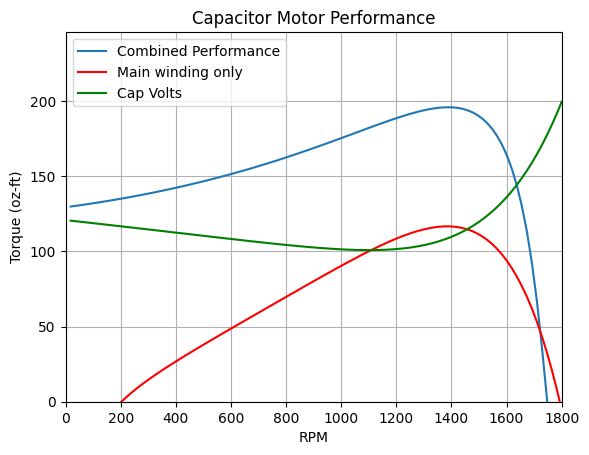

In [34]:
# combined winding
rpms_comb, torques_comb, cap_volts = get_combined_perf(Vm=115, Xo=20.55, Xm=1.52, Hp=0.75, Kr=0.926, Kp=0.96, Xa=2.37, r2=0.854, 
                               Va=115, a=1.25, sync=1800, fe_loss=94.7, f_w=13.3, r1=0.695, r1a=2.7, Rc=0.46, Xc=-5.82)

# main only
rpms_main, torques_main = get_main_perf(r1=0.695, r2=0.854, X=1.32, Xo=12.55, Kr=0.926, feff=20, fehf=19, f_w=13.3, hp=0.75,
                                        volts=115, hertz=60, poles=4, sync=1800)

rpms_comb = np.array(rpms_comb)
torques_comb = np.array(torques_comb)

rpms_main = np.array(rpms_main)
torques_main = np.array(torques_main)

import matplotlib.pyplot as plt

plt.grid()
plt.plot(rpms_comb, torques_comb)
plt.plot(rpms_main, torques_main, 'r')
plt.plot(rpms_comb, cap_volts, 'g')
plt.title('Capacitor Motor Performance')
plt.ylim([0, max(torques_comb)+ 50])
plt.xlim([0, 1800])
plt.xlabel('RPM')
plt.ylabel('Torque (oz-ft)')
plt.legend(['Combined Performance', 'Main winding only', 'Cap Volts'], loc='upper left')
plt.show()

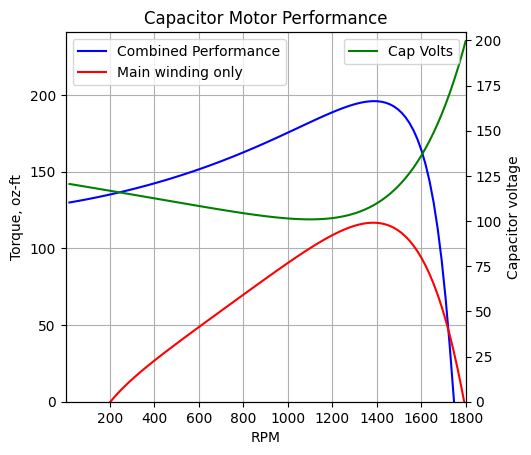

In [71]:
# combined winding
rpms_comb, torques_comb, cap_volts = get_combined_perf(Vm=115, Xo=20.55, Xm=1.52, Hp=0.75, Kr=0.926, Kp=0.96, Xa=2.37, r2=0.854, 
                               Va=115, a=1.25, sync=1800, fe_loss=94.7, f_w=13.3, r1=0.695, r1a=2.7, Rc=0.46, Xc=-5.82)

# main only
rpms_main, torques_main = get_main_perf(r1=0.695, r2=0.854, X=1.32, Xo=12.55, Kr=0.926, feff=20, fehf=19, f_w=13.3, hp=0.75,
                                        volts=115, hertz=60, poles=4, sync=1800)

rpms_comb = np.array(rpms_comb)
torques_comb = np.array(torques_comb)

rpms_main = np.array(rpms_main)
torques_main = np.array(torques_main)

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
twin1 = ax.twinx()

p1, p2 = ax.plot(rpms_comb, torques_comb, "b", rpms_main, torques_main, "r", label="Torque, oz-ft")
p3, = twin1.plot(rpms_comb, cap_volts, "g", label="Capacitor voltage")

ax.set(ylim=(0, max(torques_comb)+45), xlabel="RPM", ylabel="Torque, oz-ft")
ax.set_xlim(1, 1800)
twin1.set(ylim=(0, max(cap_volts)+5), ylabel="Capacitor voltage")

ax.grid()
ax.set_title('Capacitor Motor Performance')
ax.legend(['Combined Performance', 'Main winding only'], loc='upper left')
twin1.legend(['Cap Volts'], loc='upper right')
plt.show()  

In [1]:
318-189


129